## First attempt at using personal images of my dogs and seeing if I can train to get the correct output

### First step - creating custom images
Taking these from my personal photo albums

        1. Upload images from my camera
        2. Images are too large (MB of data) so need to compress
        3. Using a concept from the internet
                a. able to read each image from specific directory
                b. reduce the size of the image
                c. side effect was a forced rotation so need to re-rotate 90d right
                d. save image with a specific file name for later labelling

In [1]:
# from PIL import Image
# import os
# import PIL
# import glob

# fixed_height = 420
# count = 14
# images = [file for file in os.listdir('./images/dogtest/thor') if file.endswith(('jpeg', 'png', 'jpg', 'JPG'))]
# for imageName in images:
#     image = Image.open('./images/dogtest/thor/' + imageName)
#     height_percent = (fixed_height / float(image.size[1]))
#     width_size = int((float(image.size[0]) * float(height_percent)))
#     image = image.resize((width_size, fixed_height), PIL.Image.NEAREST)
#     image = image.rotate(-90)
#     image.save(f'./images/dogtest/thor/thor{count}.jpg')
#     count += 1

In [2]:
import tensorflow as tf
import os
import pathlib
import numpy as np
cwd = os.getcwd()
data_route = cwd + '/datasets/dogs/train'

In [3]:
# allows the same weights and biases to be used eash run
np.random.seed(42)
tf.random.set_seed(42)

In [4]:
batch_size = 32
img_height = 224
img_width = 224

In [5]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_route,
  validation_split=0.20,
  subset="training",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

valid_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_route,
  validation_split=0.20,
  subset="validation",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 93 files belonging to 2 classes.
Using 75 files for training.
Found 93 files belonging to 2 classes.
Using 18 files for validation.


In [6]:
class_names = train_ds.class_names
n_classes = len(class_names)
print(f'Class names: {class_names}\nNum of classes: {n_classes}')

Class names: ['atlas', 'thor']
Num of classes: 2


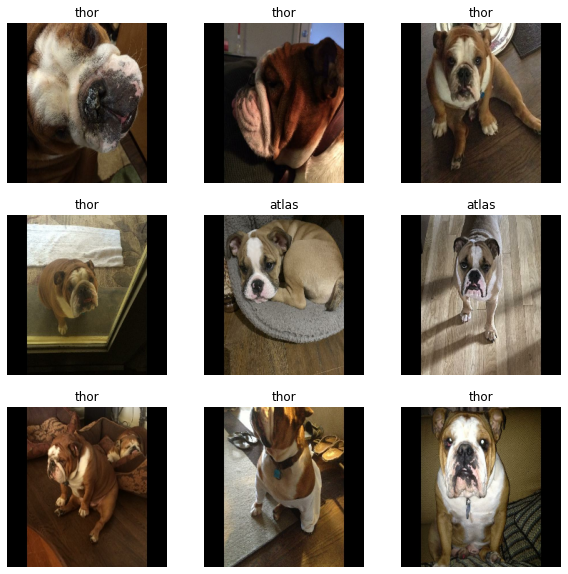

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [8]:
valid_ds.element_spec

(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None,), dtype=tf.int32, name=None))

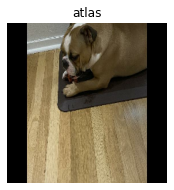

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in valid_ds.take(1):
  for i in range(1):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [10]:
model = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(2, activation='relu'),
  tf.keras.layers.Dense(n_classes)
])


In [11]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [12]:
model.layers

In [13]:
# model.summary()

In [14]:
model.fit(
  train_ds,
  validation_data=valid_ds,
  epochs=5
)


Epoch 1/5
3/3 [==============================] - 5s 1s/step - loss: 0.6796 - accuracy: 0.5467 - val_loss: 0.7903 - val_accuracy: 0.4444
Epoch 2/5
3/3 [==============================] - 4s 1s/step - loss: 0.6732 - accuracy: 0.5733 - val_loss: 0.7156 - val_accuracy: 0.4444
Epoch 3/5
3/3 [==============================] - 4s 1s/step - loss: 0.6454 - accuracy: 0.6000 - val_loss: 0.6894 - val_accuracy: 0.5556
Epoch 4/5
3/3 [==============================] - 4s 1s/step - loss: 0.6289 - accuracy: 0.6667 - val_loss: 0.7315 - val_accuracy: 0.4444
Epoch 5/5
3/3 [==============================] - 4s 1s/step - loss: 0.6320 - accuracy: 0.5733 - val_loss: 0.7021 - val_accuracy: 0.5000


In [15]:
# evaluate the model
loss, acc = model.evaluate(valid_ds, verbose=1)
print(f'Test Accuracy: {acc:.3f}')

1/1 [==============================] - 0s 386ms/step - loss: 0.7021 - accuracy: 0.5000
Test Accuracy: 0.500


In [16]:
img = tf.keras.preprocessing.image.load_img(
    cwd + '/datasets/dogs/test/thor/thor47.jpg', target_size=(img_height, img_width)
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
score = predictions.ravel()

print('There is a(n) \n%.2f percent chance the image is Atlas \nand %.2f percent chance it is Thor.'
      %(score[0]*100, 100 - (score[0]*100))
)



There is a(n) 
-0.32 percent chance the image is Atlas 
and 100.32 percent chance it is Thor.


### But what if we added more filters?


In [27]:
model = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(n_classes, activation='relu'),
])

In [28]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [29]:
model.fit(
  train_ds,
  validation_data=valid_ds,
  epochs=5
)

Epoch 1/5
3/3 [==============================] - 10s 3s/step - loss: 0.7861 - accuracy: 0.5867 - val_loss: 0.7886 - val_accuracy: 0.4444
Epoch 2/5
3/3 [==============================] - 9s 3s/step - loss: 0.6793 - accuracy: 0.5200 - val_loss: 0.6789 - val_accuracy: 0.5556
Epoch 3/5
3/3 [==============================] - 9s 3s/step - loss: 0.6931 - accuracy: 0.5067 - val_loss: 0.6903 - val_accuracy: 0.4444
Epoch 4/5
3/3 [==============================] - 10s 3s/step - loss: 0.6446 - accuracy: 0.5733 - val_loss: 0.7432 - val_accuracy: 0.4444
Epoch 5/5
3/3 [==============================] - 9s 3s/step - loss: 0.6375 - accuracy: 0.5733 - val_loss: 0.6450 - val_accuracy: 0.7778


In [30]:
# evaluate the model
loss, acc = model.evaluate(valid_ds, verbose=1)
print(f'Test Accuracy: {acc:.3f}')

1/1 [==============================] - 1s 672ms/step - loss: 0.6450 - accuracy: 0.7778
Test Accuracy: 0.778


In [31]:
img = tf.keras.preprocessing.image.load_img(
    cwd + '/datasets/dogs/test/thor/thor47.jpg', target_size=(img_height, img_width)
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
score = predictions.ravel()

print('There is a(n) \n%.2f percent chance the image is Atlas \nand %.2f percent chance it is Thor.'
      %(score[0]*100, 100 - (score[0]*100))
)

There is a(n) 
59.32 percent chance the image is Atlas 
and 40.68 percent chance it is Thor.


In [32]:
img = tf.keras.preprocessing.image.load_img(
    cwd + '/datasets/dogs/test/atlas/atlas55.jpg', target_size=(img_height, img_width)
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
score = predictions.ravel()

print('There is a(n) \n%.2f percent chance the image is Atlas \nand %.2f percent chance it is Thor.'
      %(score[0]*100, 100 - (score[0]*100))
)

There is a(n) 
131.97 percent chance the image is Atlas 
and -31.97 percent chance it is Thor.
